In [1]:
import gradio as gr
import tensorflow as tf
import numpy as np
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Flatten 

c:\Users\shubh\AppData\Local\Programs\Python\Python311\Lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning: Blowfish has been deprecated and will be removed in a future release
  "class": algorithms.Blowfish,


In [2]:
(x_train,y_train),(x_test,y_test) = tf.keras.datasets.mnist.load_data()

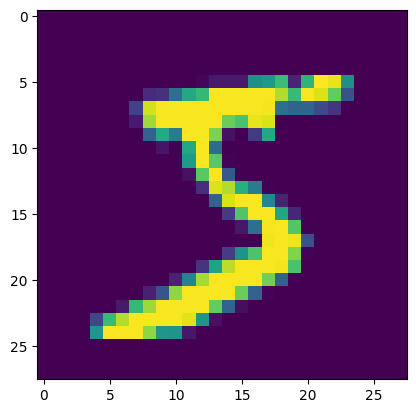

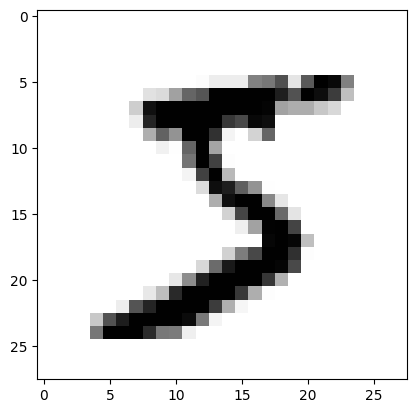

In [3]:
import matplotlib.pyplot as plt
plt.imshow(x_train[0])
plt.show()
plt.imshow(x_train[0],cmap=plt.cm.binary)

In [4]:
x_train = tf.keras.utils.normalize(x_train,axis=1)
x_test = tf.keras.utils.normalize(x_test,axis=1)

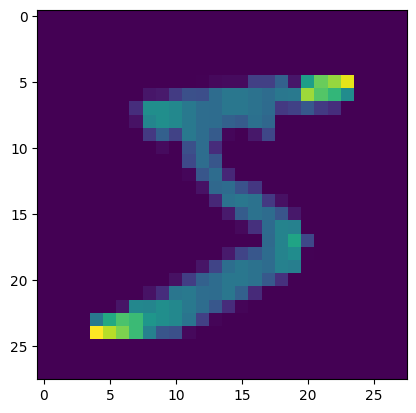

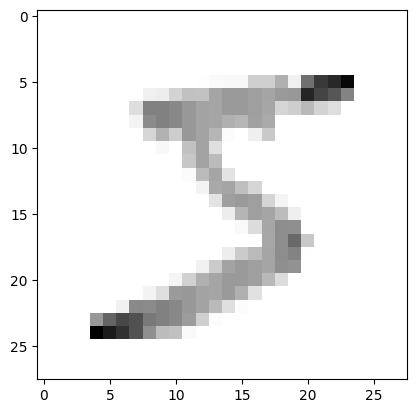

In [5]:
import matplotlib.pyplot as plt
plt.imshow(x_train[0])
plt.show()
plt.imshow(x_train[0],cmap=plt.cm.binary)

In [6]:
model = Sequential()
model.add(Flatten(input_shape=(28,28)))
model.add(Dense(128, activation='relu'))
model.add(Dense(10,activation = 'softmax'))
model.summary()

c:\Users\shubh\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

In [7]:
model.compile(loss='sparse_categorical_crossentropy',optimizer='Adam')
model.fit(x_train,y_train,epochs=10,validation_split=0.2)

Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.5765 - val_loss: 0.1907
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 0.1692 - val_loss: 0.1389
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.1120 - val_loss: 0.1189
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.0832 - val_loss: 0.1122
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.0656 - val_loss: 0.1007
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.0511 - val_loss: 0.0981
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.0376 - val_loss: 0.0976
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.0289 - val_loss: 0.0948
Epoch 9/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.0244 - val_loss: 0.1002
Epoch 10/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.0194 - val_loss: 0.0980


In [8]:
y_prob = model.predict(x_test)
y_prob

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


array([[3.01155101e-09, 1.50042159e-10, 1.25392205e-06, ...,
        9.99920726e-01, 2.78415911e-07, 6.10497636e-07],
       [3.36859577e-12, 6.32164738e-05, 9.99936700e-01, ...,
        2.43387845e-15, 1.95481950e-10, 4.76929842e-17],
       [1.21938186e-07, 9.99883294e-01, 3.62940818e-06, ...,
        2.19299272e-06, 1.08086446e-04, 2.36208368e-08],
       ...,
       [1.23388832e-12, 1.89044946e-10, 9.62312782e-12, ...,
        3.41002306e-07, 3.20804304e-07, 5.10418568e-06],
       [3.58781366e-10, 2.71037203e-11, 5.40707193e-12, ...,
        1.60074598e-09, 1.69971536e-05, 6.02928645e-12],
       [3.74432395e-11, 2.56757260e-09, 6.64096760e-08, ...,
        1.67916936e-13, 2.48670355e-12, 5.80550749e-15]], dtype=float32)

In [9]:
y_pred = y_prob.argmax(axis=1)
y_pred

array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

In [10]:
y_test

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [11]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.9754

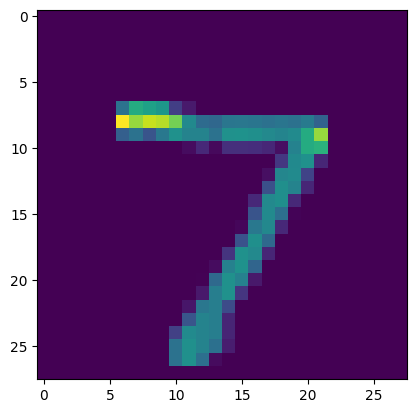

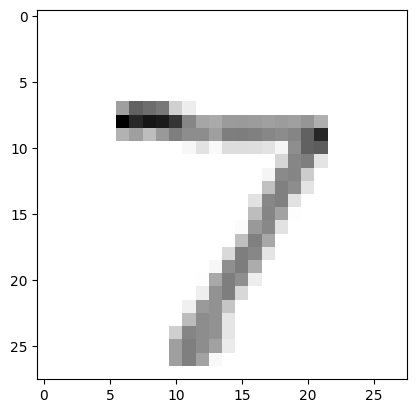

In [12]:
import matplotlib.pyplot as plt
plt.imshow(x_test[0])
plt.show()
plt.imshow(x_test[0],cmap=plt.cm.binary)

In [13]:
def sketch_recog(img):
    x = model.predict(img.reshape(1,28,28)).argmax(axis=1)
    return x

In [14]:
gr.Interface(fn=sketch_recog,inputs='sketchpad',outputs='text').launch(debug = True)

IMPORTANT: You are using gradio version 2.3.5, however version 4.44.1 is available, please upgrade.
--------
Running locally at: http://127.0.0.1:7860/
To create a public link, set `share=True` in `launch()`.
Interface loading below...


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


KeyboardInterrupt: 